In [339]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [340]:
url = 'https://raw.githubusercontent.com/yuvalavraham/my_project/main/data%20analysis%20project.csv'
acc_df = pd.read_csv(url, low_memory = False)
acc_df

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Number Fatalities,Bus \nInvolvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Day of week,Time of Day
0,20195049,WA,3,2019,Saturday,8:30:00 pm,Multiple,1,No,No,No,60,NaN,NaN,NaN,NaN,No,No,Weekend,Night
1,20195013,WA,1,2019,Sunday,7:48:00 pm,Multiple,1,No,No,No,110,NaN,NaN,NaN,NaN,No,No,Weekend,Night
2,20195110,WA,10,2019,Friday,10:09:00 pm,Single,2,No,No,No,50,NaN,NaN,NaN,NaN,No,No,Weekend,Night
3,20196026,Tas,8,2019,Sunday,4:30:00 am,Single,1,No,No,No,80,Outer Regional Australia,South East,Southern Midlands (M),Local Road,No,No,Weekend,Night
4,20195102,WA,4,2019,Sunday,12:05:00 am,Multiple,1,No,No,No,60,NaN,NaN,NaN,NaN,No,No,Weekend,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45954,19891498,NSW,1,1989,Sunday,2:35:00 pm,Multiple,3,No,-9,No,80,NaN,NaN,NaN,NaN,Yes,No,Weekend,Day
45955,19893020,Qld,1,1989,Sunday,4:00:00 am,Pedestrian,1,No,-9,No,60,NaN,NaN,NaN,NaN,Yes,No,Weekend,Night
45956,19893344,Qld,1,1989,Sunday,1:00:00 am,Single,1,No,-9,No,60,NaN,NaN,NaN,NaN,Yes,No,Weekend,Night
45957,19893229,Qld,1,1989,Sunday,5:00:00 pm,Pedestrian,1,No,-9,No,60,NaN,NaN,NaN,NaN,Yes,No,Weekend,Day


In [341]:
acc_df.shape

(45959, 20)

# 1.Wrangling data
# 1.1 Fix columns

In [342]:
acc_df.dtypes

Crash ID                          int64
State                            object
Month                             int64
Year                              int64
Dayweek                          object
Time                             object
Crash Type                       object
Number Fatalities                 int64
Bus \nInvolvement                object
Heavy Rigid Truck Involvement    object
Articulated Truck Involvement    object
Speed Limit                      object
National Remoteness Areas        object
SA4 Name 2016                    object
National LGA Name 2017           object
National Road Type               object
Christmas Period                 object
Easter Period                    object
Day of week                      object
Time of Day                      object
dtype: object

# 1.2 Missing values

In [343]:
acc_df.isnull().sum().sort_values(ascending = False)

National Remoteness Areas        40867
National Road Type               40863
SA4 Name 2016                    40853
National LGA Name 2017           40852
Crash ID                             0
State                                0
Day of week                          0
Easter Period                        0
Christmas Period                     0
Speed Limit                          0
Articulated Truck Involvement        0
Heavy Rigid Truck Involvement        0
Bus \nInvolvement                    0
Number Fatalities                    0
Crash Type                           0
Time                                 0
Dayweek                              0
Year                                 0
Month                                0
Time of Day                          0
dtype: int64

In [344]:
acc_df.columns

Index(['Crash ID', 'State', 'Month', 'Year', 'Dayweek', 'Time', 'Crash Type',
       'Number Fatalities', 'Bus \nInvolvement',
       'Heavy Rigid Truck Involvement', 'Articulated Truck Involvement',
       'Speed Limit', 'National Remoteness Areas', 'SA4 Name 2016',
       'National LGA Name 2017', 'National Road Type', 'Christmas Period',
       'Easter Period', 'Day of week', 'Time of Day'],
      dtype='object')

# שינוי שמות וסידור עמודות

# 1.3 Noisy data - outliers

In [345]:
acc_df['SpeedLimit']  = acc_df['Speed Limit']
acc_df.SpeedLimit.unique()

array(['60', '110', '50', '80', '100', '70', '90', '130', '10', '20',
       '-9', '25', '40', '15', '<40', '30', '5', 'Unspecified', '75'],
      dtype=object)

In [346]:
acc_df['SpeedLimit']  = acc_df['SpeedLimit'].replace({'<40':'40', '-9': '0'})
acc_df.SpeedLimit.unique()

array(['60', '110', '50', '80', '100', '70', '90', '130', '10', '20', '0',
       '25', '40', '15', '30', '5', 'Unspecified', '75'], dtype=object)

In [347]:
acc_df.loc[acc_df['SpeedLimit'] == 'Unspecified']


,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Number Fatalities,Bus \nInvolvement,Heavy Rigid Truck Involvement,...,Speed Limit,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Day of week,Time of Day,SpeedLimit
3982,20167008,NT,7,2016,Friday,1:30:00 pm,Multiple,2,Yes,No,...,Unspecified,Very Remote Australia,Northern Territory - Outback,Barkly (R),National or State Highway,No,No,Weekday,Day,Unspecified


In [348]:
 acc_df = acc_df.drop([3982])

In [349]:
acc_df.SpeedLimit.unique()

array(['60', '110', '50', '80', '100', '70', '90', '130', '10', '20', '0',
       '25', '40', '15', '30', '5', '75'], dtype=object)

In [350]:
acc_df.SpeedLimit = acc_df.SpeedLimit.astype('int')
acc_df.dtypes

Crash ID                          int64
State                            object
Month                             int64
Year                              int64
Dayweek                          object
Time                             object
Crash Type                       object
Number Fatalities                 int64
Bus \nInvolvement                object
Heavy Rigid Truck Involvement    object
Articulated Truck Involvement    object
Speed Limit                      object
National Remoteness Areas        object
SA4 Name 2016                    object
National LGA Name 2017           object
National Road Type               object
Christmas Period                 object
Easter Period                    object
Day of week                      object
Time of Day                      object
SpeedLimit                        int32
dtype: object

In [351]:
acc_df.replace({"-9" : '0' }, inplace=True)

In [352]:
acc_df['Heavy_Rigid_Truck_Involvement']  = acc_df['Heavy Rigid Truck Involvement']
acc_df.Heavy_Rigid_Truck_Involvement.unique()

array(['No', 'Yes', '0'], dtype=object)

# סידור זמנים

In [353]:
acc_df['New_Time'] = pd.to_datetime(acc_df['Time'], errors='coerce').dt.time

In [354]:
acc_df.New_Time = acc_df.New_Time.astype('string')

In [355]:
acc_df["hours"] =  acc_df["New_Time"].str.split(":", expand = True)[0]
acc_df["minutes"] =  acc_df["New_Time"].str.split(":", expand = True)[1]

In [356]:
acc_df.drop(['Time'], axis=1, inplace=True)
acc_df

,Crash ID,State,Month,Year,Dayweek,Crash Type,Number Fatalities,Bus \nInvolvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,National Road Type,Christmas Period,Easter Period,Day of week,Time of Day,SpeedLimit,Heavy_Rigid_Truck_Involvement,New_Time,hours,minutes
0,20195049,WA,3,2019,Saturday,Multiple,1,No,No,No,...,NaN,No,No,Weekend,Night,60,No,20:30:00,20,30
1,20195013,WA,1,2019,Sunday,Multiple,1,No,No,No,...,NaN,No,No,Weekend,Night,110,No,19:48:00,19,48
2,20195110,WA,10,2019,Friday,Single,2,No,No,No,...,NaN,No,No,Weekend,Night,50,No,22:09:00,22,09
3,20196026,Tas,8,2019,Sunday,Single,1,No,No,No,...,Local Road,No,No,Weekend,Night,80,No,04:30:00,04,30
4,20195102,WA,4,2019,Sunday,Multiple,1,No,No,No,...,NaN,No,No,Weekend,Night,60,No,00:05:00,00,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45954,19891498,NSW,1,1989,Sunday,Multiple,3,No,0,No,...,NaN,Yes,No,Weekend,Day,80,0,14:35:00,14,35
45955,19893020,Qld,1,1989,Sunday,Pedestrian,1,No,0,No,...,NaN,Yes,No,Weekend,Night,60,0,04:00:00,04,00
45956,19893344,Qld,1,1989,Sunday,Single,1,No,0,No,...,NaN,Yes,No,Weekend,Night,60,0,01:00:00,01,00
45957,19893229,Qld,1,1989,Sunday,Pedestrian,1,No,0,No,...,NaN,Yes,No,Weekend,Day,60,0,17:00:00,17,00


# התחלת חיפוש קורלציות 

In [360]:
acc_df.columns

Index(['Crash ID', 'State', 'Month', 'Year', 'Dayweek', 'Crash Type',
       'Number Fatalities', 'Bus \nInvolvement',
       'Heavy Rigid Truck Involvement', 'Articulated Truck Involvement',
       'Speed Limit', 'National Remoteness Areas', 'SA4 Name 2016',
       'National LGA Name 2017', 'National Road Type', 'Christmas Period',
       'Easter Period', 'Day of week', 'Time of Day', 'SpeedLimit',
       'Heavy_Rigid_Truck_Involvement', 'New_Time', 'hours', 'minutes'],
      dtype='object')

# הפיכת דתא לבינארי

In [362]:
x= ["Crash ID","Month","Year","Dayweek","New_Time",'hours' ,"Crash Type","Number Fatalities","Bus \nInvolvement","Heavy Rigid Truck Involvement","Articulated Truck Involvement","SpeedLimit","Christmas Period","Easter Period","Day of week","Time of Day"]
acc_dff=pd.get_dummies(acc_df[x])
acc_dff

,Crash ID,Month,Year,New_Time,hours,Number Fatalities,SpeedLimit,Dayweek_Friday,Dayweek_Monday,Dayweek_Saturday,...,Articulated Truck Involvement_No,Articulated Truck Involvement_Yes,Christmas Period_No,Christmas Period_Yes,Easter Period_No,Easter Period_Yes,Day of week_Weekday,Day of week_Weekend,Time of Day_Day,Time of Day_Night
0,20195049,3,2019,20:30:00,20,1,60,0,0,1,...,1,0,1,0,1,0,0,1,0,1
1,20195013,1,2019,19:48:00,19,1,110,0,0,0,...,1,0,1,0,1,0,0,1,0,1
2,20195110,10,2019,22:09:00,22,2,50,1,0,0,...,1,0,1,0,1,0,0,1,0,1
3,20196026,8,2019,04:30:00,04,1,80,0,0,0,...,1,0,1,0,1,0,0,1,0,1
4,20195102,4,2019,00:05:00,00,1,60,0,0,0,...,1,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45954,19891498,1,1989,14:35:00,14,3,80,0,0,0,...,1,0,0,1,1,0,0,1,1,0
45955,19893020,1,1989,04:00:00,04,1,60,0,0,0,...,1,0,0,1,1,0,0,1,0,1
45956,19893344,1,1989,01:00:00,01,1,60,0,0,0,...,1,0,0,1,1,0,0,1,0,1
45957,19893229,1,1989,17:00:00,17,1,60,0,0,0,...,1,0,0,1,1,0,0,1,1,0


In [363]:
acc_dff.columns

Index(['Crash ID', 'Month', 'Year', 'New_Time', 'hours', 'Number Fatalities',
       'SpeedLimit', 'Dayweek_Friday', 'Dayweek_Monday', 'Dayweek_Saturday',
       'Dayweek_Sunday', 'Dayweek_Thursday', 'Dayweek_Tuesday',
       'Dayweek_Wednesday', 'Crash Type_Multiple', 'Crash Type_Pedestrian',
       'Crash Type_Single', 'Bus \nInvolvement_0', 'Bus \nInvolvement_No',
       'Bus \nInvolvement_Yes', 'Heavy Rigid Truck Involvement_0',
       'Heavy Rigid Truck Involvement_No', 'Heavy Rigid Truck Involvement_Yes',
       'Articulated Truck Involvement_0', 'Articulated Truck Involvement_No',
       'Articulated Truck Involvement_Yes', 'Christmas Period_No',
       'Christmas Period_Yes', 'Easter Period_No', 'Easter Period_Yes',
       'Day of week_Weekday', 'Day of week_Weekend', 'Time of Day_Day',
       'Time of Day_Night'],
      dtype='object')

In [364]:
acc_dff = acc_dff.drop(columns=[ 'Bus \nInvolvement_0', 'Bus \nInvolvement_No','Heavy Rigid Truck Involvement_0',
       'Heavy Rigid Truck Involvement_No','Articulated Truck Involvement_0' ,'Articulated Truck Involvement_No' , 'Christmas Period_No' , 'Easter Period_No','Day of week_Weekday'])
acc_dff.head()

,Crash ID,Month,Year,New_Time,hours,Number Fatalities,SpeedLimit,Dayweek_Friday,Dayweek_Monday,Dayweek_Saturday,...,Crash Type_Pedestrian,Crash Type_Single,Bus \nInvolvement_Yes,Heavy Rigid Truck Involvement_Yes,Articulated Truck Involvement_Yes,Christmas Period_Yes,Easter Period_Yes,Day of week_Weekend,Time of Day_Day,Time of Day_Night
0,20195049,3,2019,20:30:00,20,1,60,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,20195013,1,2019,19:48:00,19,1,110,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,20195110,10,2019,22:09:00,22,2,50,1,0,0,...,0,1,0,0,0,0,0,1,0,1
3,20196026,8,2019,04:30:00,04,1,80,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,20195102,4,2019,00:05:00,00,1,60,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [365]:
acc_dff.columns

Index(['Crash ID', 'Month', 'Year', 'New_Time', 'hours', 'Number Fatalities',
       'SpeedLimit', 'Dayweek_Friday', 'Dayweek_Monday', 'Dayweek_Saturday',
       'Dayweek_Sunday', 'Dayweek_Thursday', 'Dayweek_Tuesday',
       'Dayweek_Wednesday', 'Crash Type_Multiple', 'Crash Type_Pedestrian',
       'Crash Type_Single', 'Bus \nInvolvement_Yes',
       'Heavy Rigid Truck Involvement_Yes',
       'Articulated Truck Involvement_Yes', 'Christmas Period_Yes',
       'Easter Period_Yes', 'Day of week_Weekend', 'Time of Day_Day',
       'Time of Day_Night'],
      dtype='object')

# הכנסה של יום או לילה בצורה בינארית לדתא מקורי בשביל בניית טבלאות

In [366]:
acc_df["Time of Day_Night"]=acc_dff['Time of Day_Night']
acc_df["Time of Day_Day"]=acc_dff['Time of Day_Day']
acc_df

,Crash ID,State,Month,Year,Dayweek,Crash Type,Number Fatalities,Bus \nInvolvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Easter Period,Day of week,Time of Day,SpeedLimit,Heavy_Rigid_Truck_Involvement,New_Time,hours,minutes,Time of Day_Night,Time of Day_Day
0,20195049,WA,3,2019,Saturday,Multiple,1,No,No,No,...,No,Weekend,Night,60,No,20:30:00,20,30,1,0
1,20195013,WA,1,2019,Sunday,Multiple,1,No,No,No,...,No,Weekend,Night,110,No,19:48:00,19,48,1,0
2,20195110,WA,10,2019,Friday,Single,2,No,No,No,...,No,Weekend,Night,50,No,22:09:00,22,09,1,0
3,20196026,Tas,8,2019,Sunday,Single,1,No,No,No,...,No,Weekend,Night,80,No,04:30:00,04,30,1,0
4,20195102,WA,4,2019,Sunday,Multiple,1,No,No,No,...,No,Weekend,Night,60,No,00:05:00,00,05,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45954,19891498,NSW,1,1989,Sunday,Multiple,3,No,0,No,...,No,Weekend,Day,80,0,14:35:00,14,35,0,1
45955,19893020,Qld,1,1989,Sunday,Pedestrian,1,No,0,No,...,No,Weekend,Night,60,0,04:00:00,04,00,1,0
45956,19893344,Qld,1,1989,Sunday,Single,1,No,0,No,...,No,Weekend,Night,60,0,01:00:00,01,00,1,0
45957,19893229,Qld,1,1989,Sunday,Pedestrian,1,No,0,No,...,No,Weekend,Day,60,0,17:00:00,17,00,0,1


In [367]:
acc_df.pivot_table('Number Fatalities',"hours", aggfunc = 'count')

,Number Fatalities
hours,
00,1633
01,1436
02,1241
03,1112
04,954
05,1199
06,1582
07,1563
08,1651


<AxesSubplot:xlabel='Year', ylabel='count'>

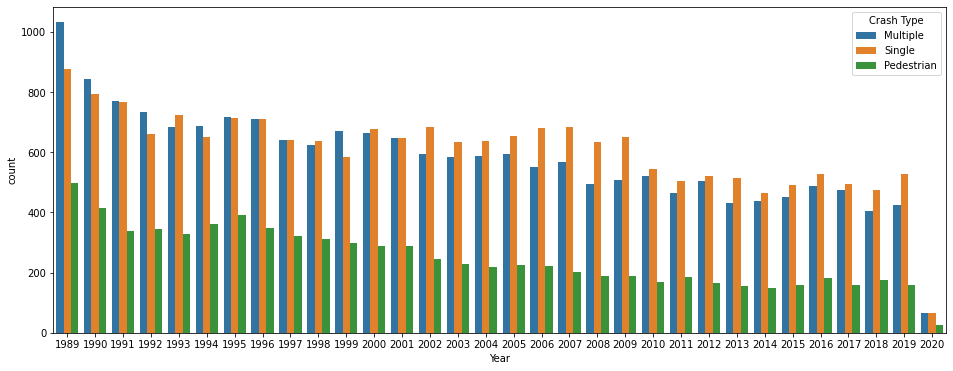

In [368]:
plt.figure(figsize=(16,6))
sns.countplot(x="Year",hue="Crash Type" ,data=acc_df)

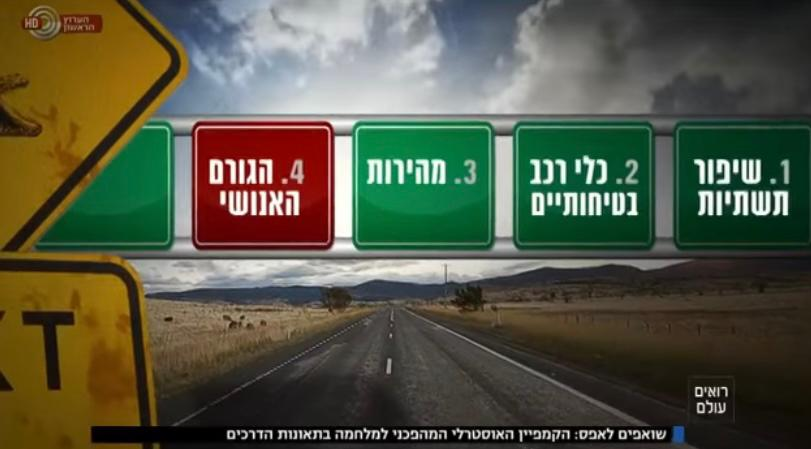

In [407]:
from IPython.display import display
from PIL import Image


path1="הגורם האנושי .jpeg"
display(Image.open(path1))

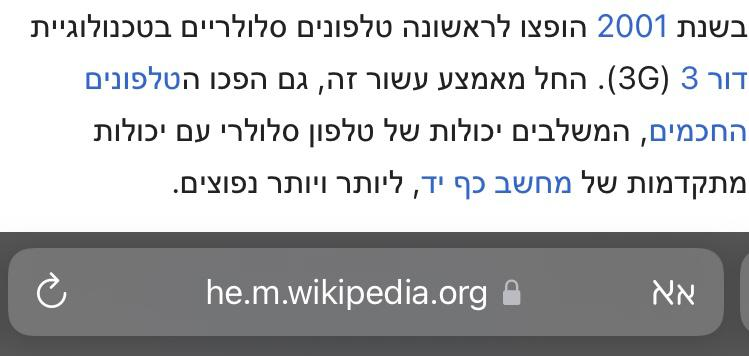

In [415]:
path2="ויקיפדיה 2001.jpeg" 
display(Image.open(path2))

<AxesSubplot:xlabel='SpeedLimit', ylabel='count'>

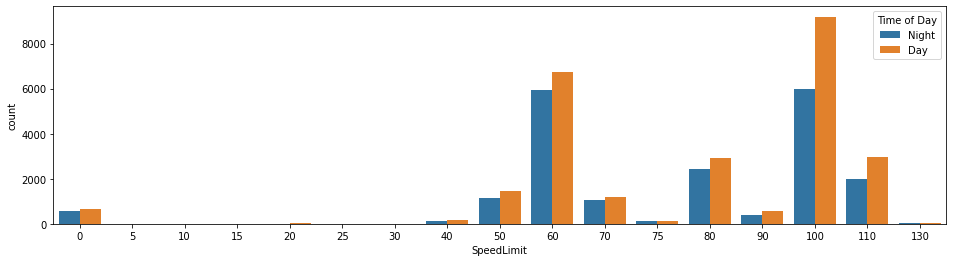

In [369]:
plt.figure(figsize=(16,4))
sns.countplot(x="SpeedLimit",hue="Time of Day" ,data=acc_df);

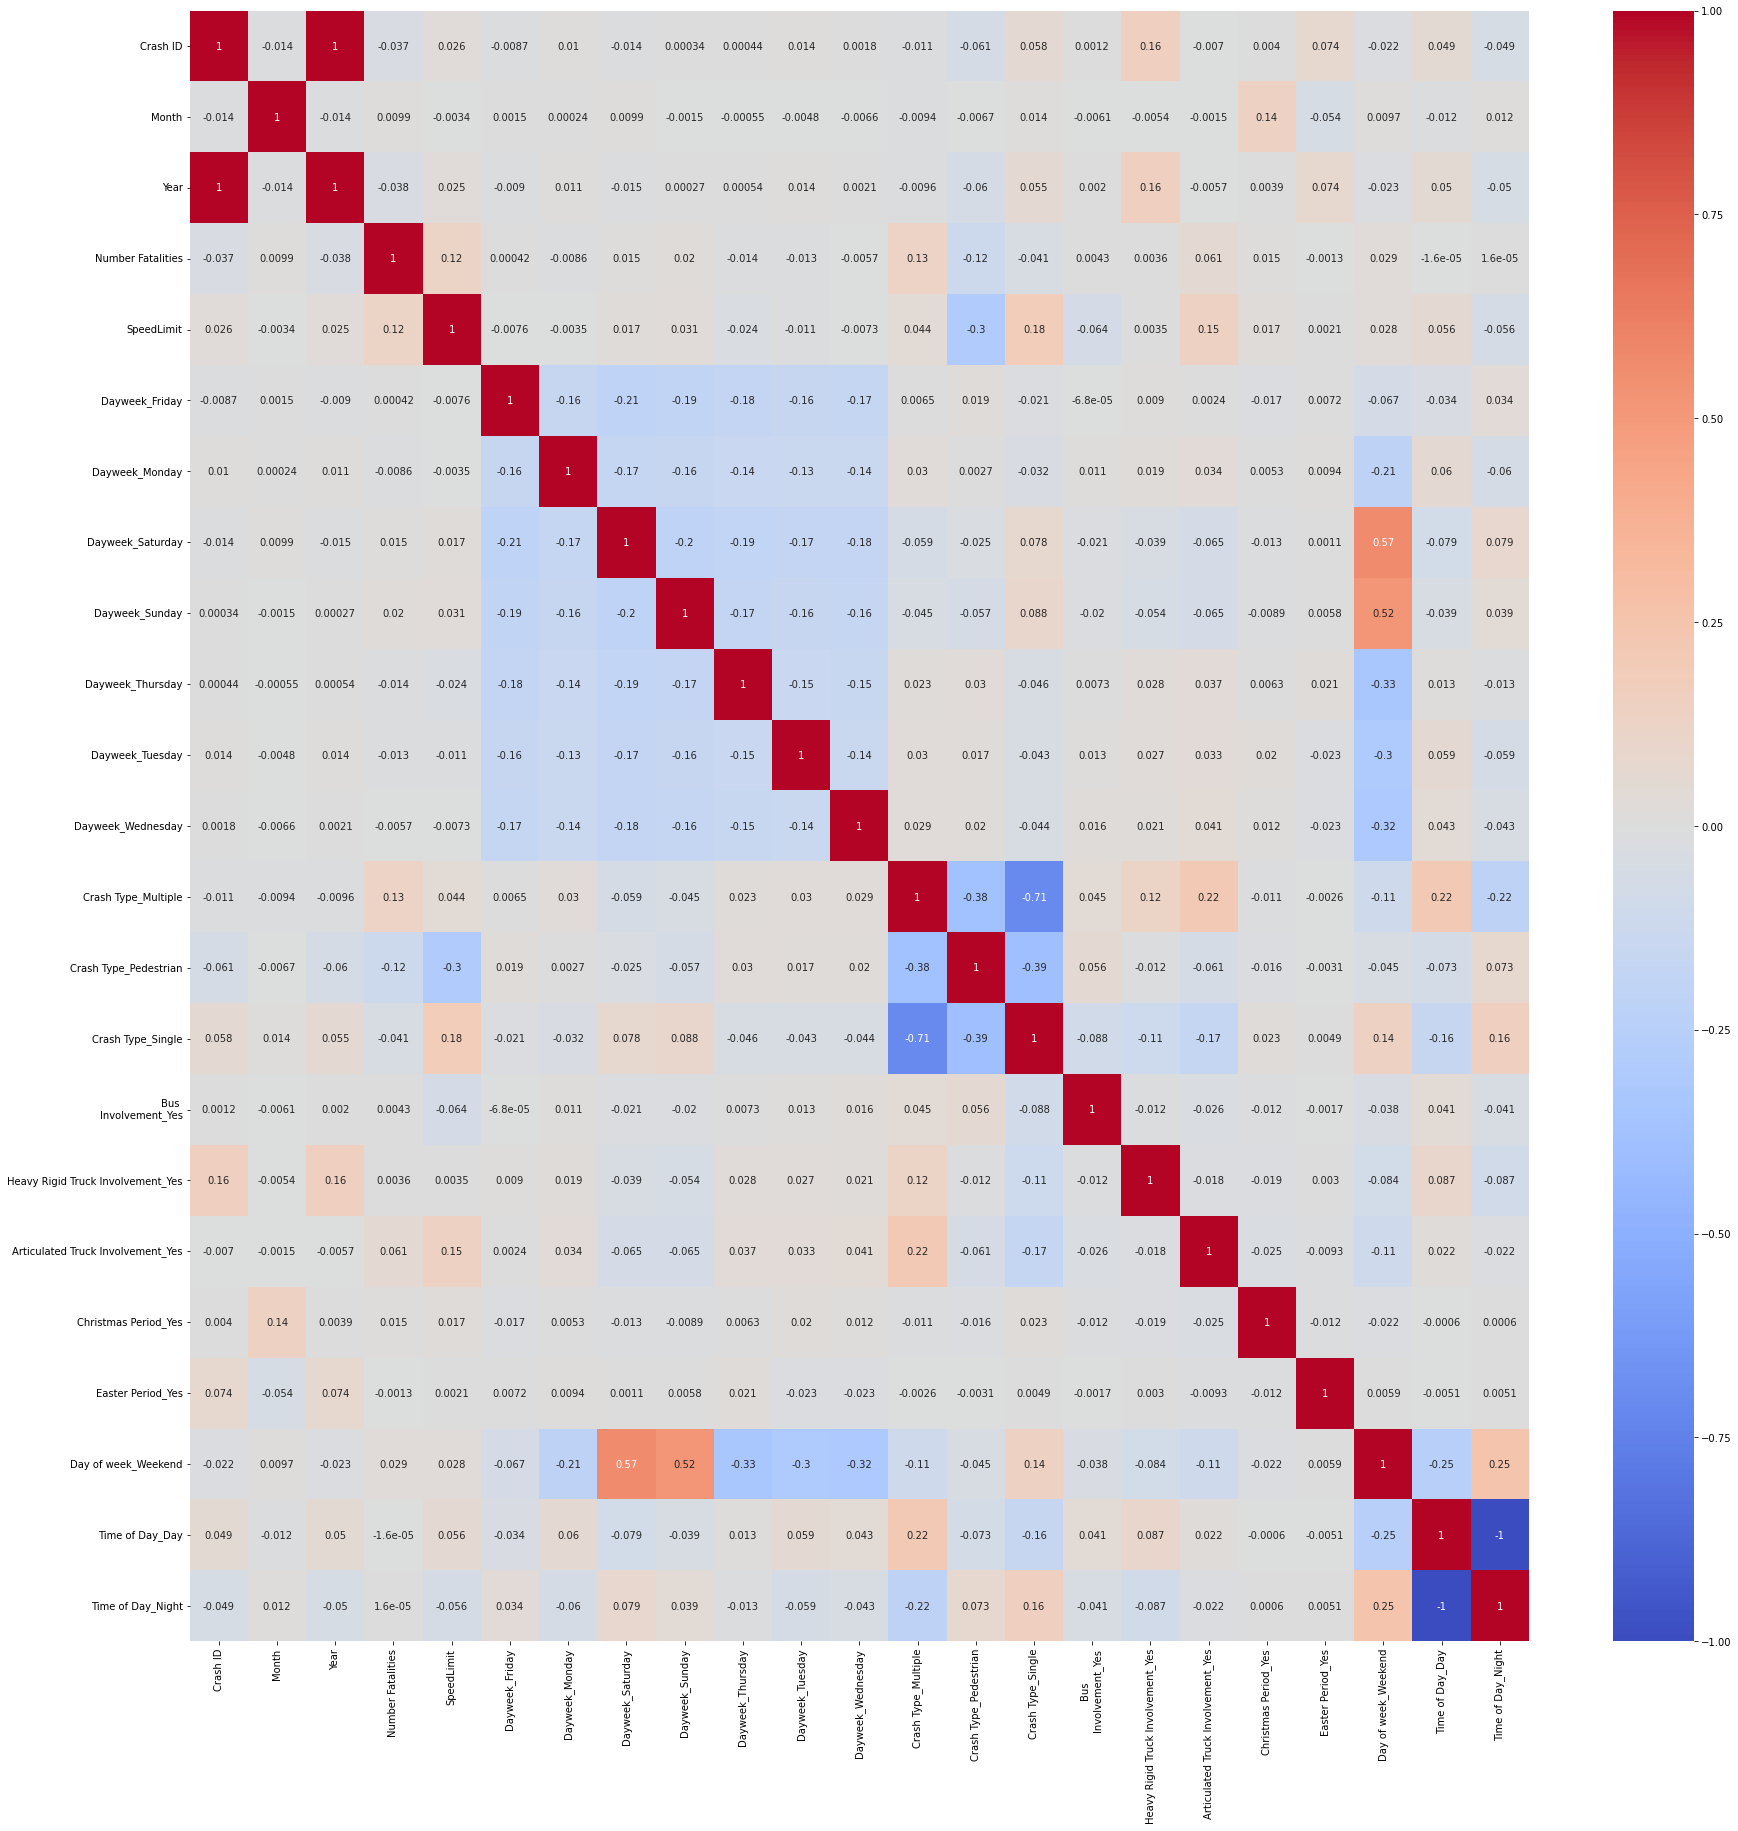

In [370]:
corrs = acc_dff.corr(method = 'spearman')
plt.figure(figsize = (30,30))
sns.heatmap(corrs,cmap = 'coolwarm' , center = 0 , annot = True);

In [371]:
pppp = acc_dff.pivot_table('Number Fatalities', 'Month' , aggfunc = 'count')
pppp

,Number Fatalities
Month,
1,3770
2,3522
3,4071
4,3721
5,3920
6,3724
7,3738
8,3847
9,3738


In [372]:
Fatalities_Mont = acc_dff.pivot_table('Number Fatalities', 'Month', aggfunc = 'count').sort_values(by = 'Number Fatalities')
Fatalities_Mont

,Number Fatalities
Month,
2,3522
4,3721
6,3724
7,3738
9,3738
1,3770
8,3847
11,3855
5,3920


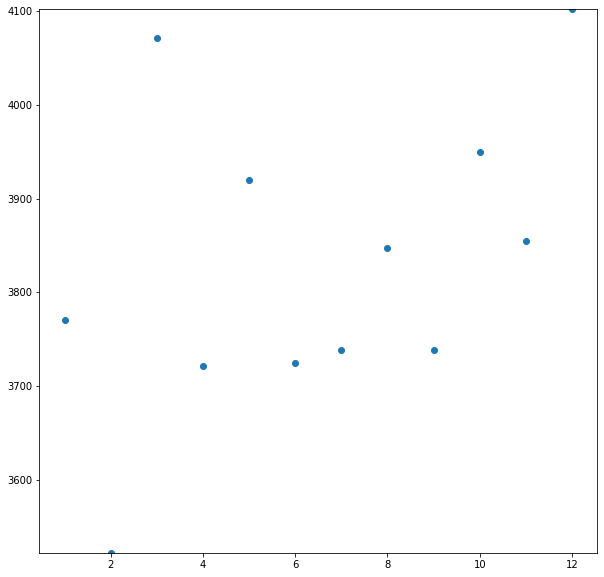

In [373]:
order = [5,0,10,1,8,2,3,6,4,9,7,11]
plt.figure(figsize = (10,10))
plt.scatter(Fatalities_Mont.index[order],Fatalities_Mont.values[order])
plt.ylim(3522,4102);
             

#מסקנה : מצאנו כי קיים קשר ישיר בין חודשי השנה לכמות ההרגוגים . בחודש דצמבר מספר ההוריגים הוא הגבוב ביותר מצאנו כי רוב אוכלסית אוסטרליה מגדירים עצמם כנוצרים ולכן הסיבה הסבירה לכמות הרוגים # בדצמבר היא חג הכריסמס   

In [374]:
acc_dff.pivot_table('Number Fatalities', 'Year' , aggfunc = 'count')

,Number Fatalities
Year,
1989,2407
1990,2050
1991,1874
1992,1736
1993,1737
1994,1702
1995,1822
1996,1768
1997,1601


In [375]:
acc_dff.pivot_table('Crash Type_Multiple', 'Month' , aggfunc = 'count')

,Crash Type_Multiple
Month,
1,3770
2,3522
3,4071
4,3721
5,3920
6,3724
7,3738
8,3847
9,3738


In [376]:
yuval = acc_dff.pivot_table('Crash Type_Single','SpeedLimit', aggfunc = 'mean')
yuval

,Crash Type_Single
SpeedLimit,
0,0.580016
5,0.333333
10,0.411765
15,1.000000
20,0.500000
25,0.000000
30,0.538462
40,0.398714
50,0.371440


מסקנה :  יש קשק ישיר בין התרסקויות רכב בודד לבין מגבלת המהירות בכביש בו נסע ככל שמגבלת המהירות גבוהה יותר כך האחוז התרסקיות של רכב בודד גדול יותר### 


<AxesSubplot:xlabel='Crash Type', ylabel='SpeedLimit'>

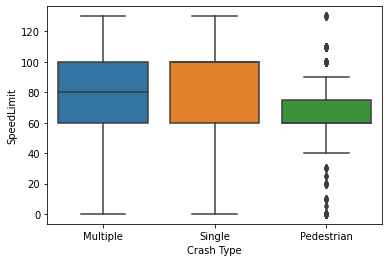

In [377]:
sns.boxplot(x = 'Crash Type' , y = 'SpeedLimit' , data = acc_df)

In [378]:
#sns.regplot(y = 'Crash Type_Single' ,x = 'SpeedLimit' ,data = acc_dff)

In [379]:
#sns.countplot(x = 'SpeedLimit'  , data = w)

# דאטות של מדינות לבד ושל סוגי תאונה לבד

In [380]:
acc_df.State.unique()


array(['WA', 'Tas', 'NT', 'ACT', 'Vic', 'NSW', 'Qld', 'SA'], dtype=object)

In [381]:
WA = acc_df.loc[acc_df["State"] == 'WA']
Tas = acc_df.loc[acc_df["State"] == 'Tas']
NT = acc_df.loc[acc_df["State"] == 'NT']
ACT = acc_df.loc[acc_df["State"] == 'ACT']
Vic = acc_df.loc[acc_df["State"] == 'Vic']
NSW = acc_df.loc[acc_df["State"] == 'NSW']
Qld = acc_df.loc[acc_df["State"] == 'Qld']
SA = acc_df.loc[acc_df["State"] == 'SA']
NT.head()

,Crash ID,State,Month,Year,Dayweek,Crash Type,Number Fatalities,Bus \nInvolvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Easter Period,Day of week,Time of Day,SpeedLimit,Heavy_Rigid_Truck_Involvement,New_Time,hours,minutes,Time of Day_Night,Time of Day_Day
9,20197010,NT,12,2019,Sunday,Multiple,1,No,No,No,...,No,Weekend,Day,70,No,13:00:00,13,00,0,1
20,20197016,NT,4,2019,Saturday,Pedestrian,1,No,No,No,...,No,Weekend,Night,100,No,19:10:00,19,10,1,0
50,20197005,NT,8,2019,Tuesday,Single,2,No,No,No,...,No,Weekday,Night,80,No,02:50:00,02,50,1,0
51,20197023,NT,4,2019,Tuesday,Pedestrian,1,No,No,No,...,No,Weekday,Night,80,No,21:34:00,21,34,1,0
54,20197009,NT,5,2019,Wednesday,Single,1,No,No,No,...,No,Weekday,Night,80,No,00:05:00,00,05,1,0


In [382]:
'Multiple', 'Single', 'Pedestrian'
Multiple = acc_df.loc[acc_df["Crash Type"] == 'Multiple']
Single = acc_df.loc[acc_df["Crash Type"] == 'Single']
Pedestrian = acc_df.loc[acc_df["Crash Type"] == 'Pedestrian']
Pedestrian.head()

,Crash ID,State,Month,Year,Dayweek,Crash Type,Number Fatalities,Bus \nInvolvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Easter Period,Day of week,Time of Day,SpeedLimit,Heavy_Rigid_Truck_Involvement,New_Time,hours,minutes,Time of Day_Night,Time of Day_Day
20,20197016,NT,4,2019,Saturday,Pedestrian,1,No,No,No,...,No,Weekend,Night,100,No,19:10:00,19,10,1,0
29,20191252,NSW,7,2019,Saturday,Pedestrian,1,No,No,No,...,No,Weekend,Day,60,No,17:30:00,17,30,0,1
31,20194015,SA,7,2019,Saturday,Pedestrian,1,No,No,No,...,No,Weekend,Day,50,No,12:10:00,12,10,0,1
33,20195012,WA,12,2019,Sunday,Pedestrian,1,No,No,No,...,No,Weekend,Night,110,No,03:45:00,03,45,1,0
37,20193191,Qld,12,2019,Saturday,Pedestrian,1,No,No,No,...,No,Weekend,Night,100,No,22:00:00,22,00,1,0


# סתם גרפים שחיפשתי עליהם דברים

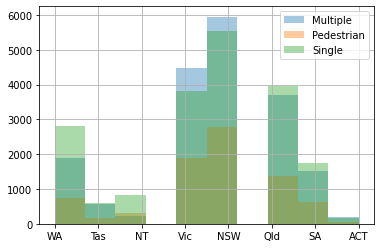

In [383]:
acc_df.groupby('Crash Type')['State'].hist(alpha=0.4,legend=True);

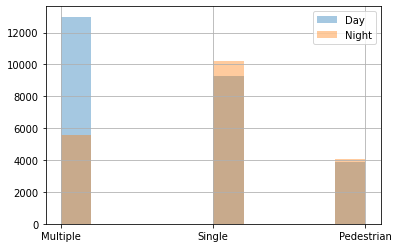

In [384]:
acc_df.groupby('Time of Day')['Crash Type'].hist(alpha=0.4,legend=True);

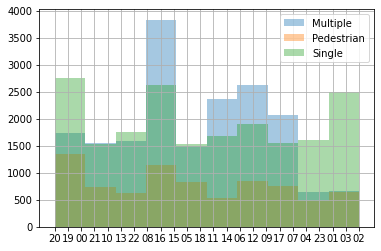

In [385]:
acc_df.groupby('Crash Type')['hours'].hist(alpha=0.4,legend=True); 

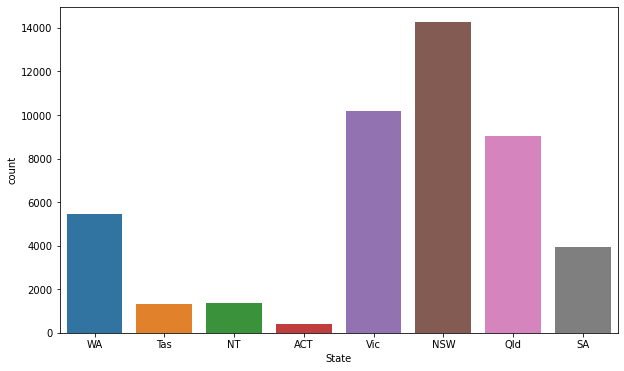

In [386]:
plt.figure(figsize=(10,6))
sns.countplot(x="State", data=acc_df);

In [387]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3 , random_state =42)

NameError: name 'train_test_split' is not defined

In [ ]:
import sklearn as sk
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 10000 , max_depth = 4 , max_samples = 100 , random_state = 42)
model.fit(x_train , y_train.values.ravel())
eval(x_test,y_test,model)

In [ ]:
sns.countplot(x= 'Crash Type' , hue = 'Dayweek', data = acc_df)
plt.title('accident by crash type and day ')
plt.show()